In [1]:
import os
import config.const as const
from utils.plots_func import *

import pandas as pd
import numpy as np

## Calculate Pearson correlation between distance and difference in lifetime

In [2]:
DATA_PREPARATION_DIR = const.DATA_PREPARATION_DIR

In [3]:
sample_type='core'
full_tissue_features_path = os.path.join(const.FULL_TISSUE_DIR, sample_type, f"FLIM_features_full_tissue_with_mae.csv")
full_tissue_nuclei_df = pd.read_csv(full_tissue_features_path, dtype={'leap_ID': str})


radius_columns = [col for col in full_tissue_nuclei_df.columns if col.startswith('mae_radius_')]

# Extract the radius sizes from column names
radius_sizes = [int(col.split('_')[-1]) for col in radius_columns]

# Drop rows with NaNs in radius columns
full_tissue_nuclai_df_clean = full_tissue_nuclei_df.dropna(subset=radius_columns)


### Calculate Pearson correlation nuclei-wise

In [7]:
corr_df_columns = ['leap_ID', 'nucleus_label'] + radius_columns

In [8]:
correlation_nuclei_df = full_tissue_nuclai_df_clean[corr_df_columns].copy()

correlation_nuclei_df['Correlation'] = correlation_nuclei_df[radius_columns].apply(
    lambda row: np.corrcoef(row.values, radius_sizes)[0, 1],
    axis=1
)

correlation_nuclei_df.head()

/home/reutme/.conda/envs/flim_stardist/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/reutme/.conda/envs/flim_stardist/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


,leap_ID,nucleus_label,mae_radius_20,mae_radius_40,mae_radius_60,mae_radius_80,mae_radius_100,mae_radius_120,Correlation
0,015,1,0.174521,0.228092,0.190296,0.184568,0.220763,0.219502,0.468601
1,015,2,0.097728,0.263118,0.368078,0.425586,0.371470,0.416411,0.845853
2,015,3,0.098885,0.168129,0.195686,0.185029,0.192814,0.167086,0.601853
3,015,4,0.180127,0.255582,0.201160,0.210482,0.222373,0.235902,0.379591
4,015,5,0.051776,0.210250,0.245101,0.229755,0.191312,0.252795,0.668805


In [9]:
output_correlation_path = os.path.join(DATA_PREPARATION_DIR, 'correlation_df_distance_and_difference_in_lifetime_nuclei_wise.csv')

correlation_nuclei_df.to_csv(output_correlation_path, index=False)

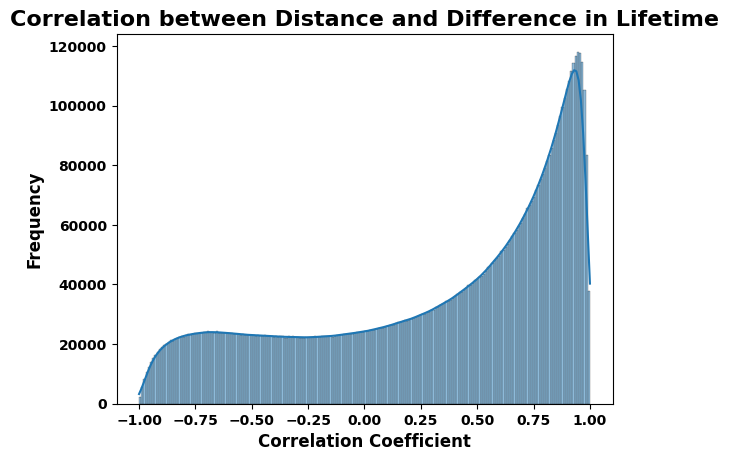

In [10]:
plot_hist_sns(correlation_nuclei_df['Correlation'],'Correlation between Distance and Difference in Lifetime', 'Correlation Coefficient')

### Calculate Pearson correlation tissue-wise

In [4]:
correlations_tissue_wise = []

#Group by leap_ID and calculate mean and correlation
for leap_id, group in full_tissue_nuclai_df_clean.groupby('leap_ID'):
    # Calculate the mean of `mae_radius_{radius_size}` columns
    mean_values = group[radius_columns].mean().values
    # Calculate the Pearson correlation between radius sizes and mean values
    correlation= np.corrcoef(radius_sizes, mean_values)[0, 1]

    correlations_tissue_wise.append({'leap_ID': leap_id, 'Correlation': correlation})

# Convert results into a DataFrame
correlation_tissue_df = pd.DataFrame(correlations_tissue_wise)
correlation_tissue_df.head()


,leap_ID,Correlation
0,015,0.947149
1,017,0.984799
2,019,0.941284
3,021,0.930563
4,023,0.984135


In [5]:
output_correlation_path = os.path.join(DATA_PREPARATION_DIR, 'correlation_df_distance_and_difference_in_lifetime_tissue_wise.csv')
correlation_tissue_df.to_csv(output_correlation_path, index=False)

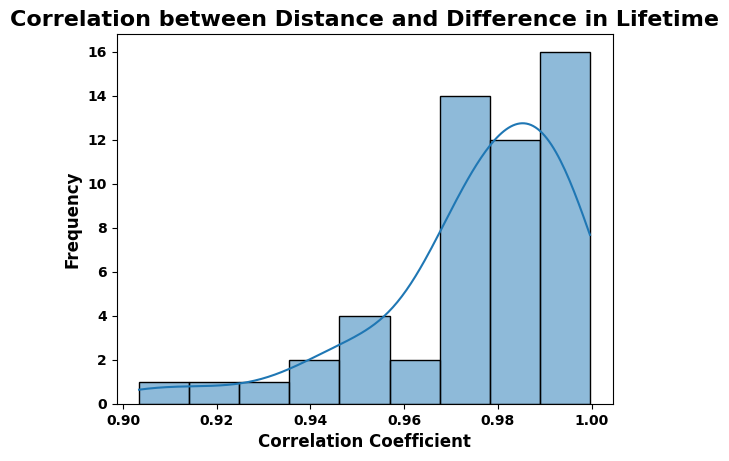

In [6]:
plot_hist_sns(correlation_tissue_df['Correlation'], 'Correlation between Distance and Difference in Lifetime', 'Correlation Coefficient')